# **Predicting Activity of Short Antimicrobial Peptides**

Jupyter notebook by [Chanin Nantasenamat](https://medium.com/@chanin.nantasenamat) (aka [Data Professor](http://youtube.com/dataprofessor)

Dataset:
[Paper](https://www.cell.com/molecular-therapy-family/nucleic-acids/fulltext/S2162-2531(20)30132-3) | [Dataset](https://cbbio.online/AxPEP/?action=dataset)

# **Install conda**

In [82]:
################################################################################
# INSTALL CONDA ON GOOGLE COLAB
################################################################################
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

# **Download and Install Pfeature**

In [2]:
! wget https://github.com/raghavagps/Pfeature/raw/master/PyLib/Pfeature.zip

--2024-10-28 23:18:47--  https://github.com/raghavagps/Pfeature/raw/master/PyLib/Pfeature.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/raghavagps/Pfeature/master/PyLib/Pfeature.zip [following]
--2024-10-28 23:18:47--  https://raw.githubusercontent.com/raghavagps/Pfeature/master/PyLib/Pfeature.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519486 (507K) [application/zip]
Saving to: ‘Pfeature.zip’

Pfeature.zip        100%[===================>] 507.31K  --.-KB/s    in 0.06s   

2024-10-28 23:18:47 (8.12 MB/s) - ‘Pfeature.zip’ saved [519486/519486]



In [3]:
! unzip Pfeature.zip

Archive:  Pfeature.zip
   creating: Pfeature/
  inflating: Pfeature/PKG-INFO       
   creating: __MACOSX/
   creating: __MACOSX/Pfeature/
  inflating: __MACOSX/Pfeature/._PKG-INFO  
  inflating: Pfeature/README         
  inflating: __MACOSX/Pfeature/._README  
  inflating: Pfeature/setup.py       
  inflating: __MACOSX/Pfeature/._setup.py  
  inflating: Pfeature/Functions_Tables.pdf  
  inflating: __MACOSX/Pfeature/._Functions_Tables.pdf  
   creating: Pfeature/build/
   creating: Pfeature/build/lib/
   creating: Pfeature/build/lib/Pfeature/
  inflating: Pfeature/build/lib/Pfeature/bonds.csv  
   creating: __MACOSX/Pfeature/build/
   creating: __MACOSX/Pfeature/build/lib/
   creating: __MACOSX/Pfeature/build/lib/Pfeature/
  inflating: __MACOSX/Pfeature/build/lib/Pfeature/._bonds.csv  
  inflating: Pfeature/build/lib/Pfeature/pfeature.py  
  inflating: __MACOSX/Pfeature/build/lib/Pfeature/._pfeature.py  
  inflating: Pfeature/build/lib/Pfeature/AAIndexNames.csv  
  inflating: __MACOSX

In [32]:
%cd Pfeature

[Errno 2] No such file or directory: 'Pfeature'
/content/Pfeature/Pfeature
/content/Pfeature


In [33]:
! python setup.py install

/usr/local/lib/python3.7/distutils/dist.py:274: UserWarning: Unknown distribution option: 'zip_safe'
  warnings.warn(msg)
running install
running build
running build_py
copying Pfeature/__init__.py -> build/lib/Pfeature
error: can't copy 'Pfeature/pt.tar.xz': doesn't exist or not a regular file


# **Install CD-HIT**

In [35]:
! conda install -c bioconda cd-hit -y

Solving environment: - \ | done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 24.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



# **Load peptide dataset**

In [36]:
! wget https://raw.githubusercontent.com/dataprofessor/AMP/main/train_po.fasta

--2024-10-28 23:26:25--  https://raw.githubusercontent.com/dataprofessor/AMP/main/train_po.fasta
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52619 (51K) [text/plain]
Saving to: ‘train_po.fasta’

train_po.fasta      100%[===================>]  51.39K  --.-KB/s    in 0.02s   

2024-10-28 23:26:25 (3.22 MB/s) - ‘train_po.fasta’ saved [52619/52619]



In [37]:
! wget https://raw.githubusercontent.com/dataprofessor/AMP/main/train_ne.fasta

--2024-10-28 23:26:27--  https://raw.githubusercontent.com/dataprofessor/AMP/main/train_ne.fasta
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57206 (56K) [text/plain]
Saving to: ‘train_ne.fasta’

train_ne.fasta      100%[===================>]  55.87K  --.-KB/s    in 0.02s   

2024-10-28 23:26:27 (3.38 MB/s) - ‘train_ne.fasta’ saved [57206/57206]



In [38]:
! cat train_ne.fasta

>nonamp5_30_1
FPPWE
>nonamp5_30_2
FPPWM
>nonamp5_30_3
IEFFT
>nonamp5_30_4
RYLPT
>nonamp5_30_5
EDRTY
>nonamp5_30_6
FPPWVL
>nonamp5_30_7
GAPMFV
>nonamp5_30_8
KPPWRL
>nonamp5_30_9
NPTNLH
>nonamp5_30_10
DTVNAA
>nonamp5_30_11
MERQVL
>nonamp5_30_12
PIDPGV
>nonamp5_30_13
KPLWRL
>nonamp5_30_14
FGVLNFF
>nonamp5_30_15
GSEIQPR
>nonamp5_30_16
NNLDEIK
>nonamp5_30_17
VPPIGWF
>nonamp5_30_18
EAYAFGL
>nonamp5_30_19
TNDFMRF
>nonamp5_30_20
VIYIFAR
>nonamp5_30_21
DYMGWMDF
>nonamp5_30_22
GCVLLPWC
>nonamp5_30_23
MEDEGAGG
>nonamp5_30_24
SVQFKPRL
>nonamp5_30_25
DEVKIVLD
>nonamp5_30_26
SPPFAPRL
>nonamp5_30_27
TGVAWRIT
>nonamp5_30_28
PTHIKWGD
>nonamp5_30_29
MWPFPSDK
>nonamp5_30_30
EPFKISIHL
>nonamp5_30_31
GPDSSFLRL
>nonamp5_30_32
MAQDAITAV
>nonamp5_30_33
TLTSFGEWR
>nonamp5_30_34
CYIQNCPRG
>nonamp5_30_35
SQPSMRLRF
>nonamp5_30_36
TPTAFYGVR
>nonamp5_30_37
NPQQDFMRF
>nonamp5_30_38
MYKLLIINP
>nonamp5_30_39
AGQDGFMRF
>nonamp5_30_40
YDRYEVVYR
>nonamp5_30_41
CLIQDCPEG
>nonamp5_30_42
NQEGLFHGR
>nonamp5_30_43
GLVPPADKY
>

# **Remove redundant sequences using CD-HIT**

In [39]:
! cd-hit -i train_po.fasta -o train_po_cdhit.txt -c 0.99

Program: CD-HIT, V4.8.1, Mar 01 2019, 14:14:47
Command: cd-hit -i train_po.fasta -o train_po_cdhit.txt -c
         0.99

Started: Mon Oct 28 23:26:31 2024
                            Output                              
----------------------------------------------------------------
total seq: 1445
longest and shortest : 30 and 11
Total letters: 30071
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 1 X 10M = 10M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 76M

Table limit with the given memory limit:
Max number of representatives: 4000000
Max number of word counting entries: 90485873

comparing sequences from          0  to       1445
.
     1445  finished       1337  clusters

Approximated maximum memory consumption: 76M
writing new database
writing clustering information
program completed !

Total CPU time 0.15


In [40]:
! cd-hit -i train_ne.fasta -o train_ne_cdhit.txt -c 0.99

Program: CD-HIT, V4.8.1, Mar 01 2019, 14:14:47
Command: cd-hit -i train_ne.fasta -o train_ne_cdhit.txt -c
         0.99

Started: Mon Oct 28 23:26:33 2024
                            Output                              
----------------------------------------------------------------
total seq: 1445
longest and shortest : 30 and 11
Total letters: 30071
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 1 X 10M = 10M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 76M

Table limit with the given memory limit:
Max number of representatives: 4000000
Max number of word counting entries: 90485331

comparing sequences from          0  to       1445
.
     1445  finished       1422  clusters

Approximated maximum memory consumption: 76M
writing new database
writing clustering information
program completed !

Total CPU time 0.13


In [41]:
! ls -l

total 652
drwxr-xr-x 3 root root   4096 Jul 28  2022 build
-rw-r--r-- 1 root root  86079 Sep 29  2020 Functions_Tables.pdf
drwxr-xr-x 2 root root   4096 Oct 12  2022 Pfeature
-rw-r--r-- 1 root root 221146 Sep 29  2020 Pfeature_Descriptors.pdf
-rw-r--r-- 1 root root    971 Sep 28  2020 PKG-INFO
-rw-r--r-- 1 root root   1265 Sep 29  2020 README
-rw-r--r-- 1 root root   1267 Sep 29  2020 setup.py
-rw-r--r-- 1 root root  54341 Oct 28 23:26 train_ne_cdhit.txt
-rw-r--r-- 1 root root  61425 Oct 28 23:26 train_ne_cdhit.txt.clstr
-rw-r--r-- 1 root root  57206 Oct 28 23:26 train_ne.fasta
-rw-r--r-- 1 root root  47229 Oct 28 23:26 train_po_cdhit.txt
-rw-r--r-- 1 root root  56665 Oct 28 23:26 train_po_cdhit.txt.clstr
-rw-r--r-- 1 root root  52619 Oct 28 23:26 train_po.fasta


In [42]:
! grep ">" train_po_cdhit.txt | wc -l

1337


In [43]:
! grep ">" train_po.fasta | wc -l

1529


In [44]:
! grep ">" train_ne.fasta | wc -l

1529


In [45]:
! grep ">" train_ne_cdhit.txt | wc -l

1422


# **Calculate features using the Pfeature library**

Feature classes provided by Pfeature is summarized in the tables below.

**Composition Based Features**

Feature claass | Description | Function
---|---|---
AAC | Amino acid composition | aac_wp
DPC | Dipeptide composition | dpc_wp
TPC | Tripeptide composition | tpc_wp
ABC | Atom and bond composition | atc_wp, btc_wp
PCP | Physico-chemical properties | pcp_wp
AAI | Amino acid index composition | aai_wp
RRI | Repetitive Residue Information | rri_wp
DDR | Distance distribution of residues |ddr_wp
PRI | Physico-chemical properties repeat composition | pri_wp
SEP | Shannon entropy | sep_wp
SER | Shannon entropy of residue level | ser_wp
SPC | Shannon entropy of physicochemical property | spc_wp
ACR | Autocorrelation | acr_wp
CTC | Conjoint Triad Calculation | ctc_wp
CTD | Composition enhanced transition distribution | ctd_wp
PAAC | Pseudo amino acid composition | paac_wp
APAAC | Amphiphilic pseudo amino acid composition | apaac_wp
QSO | Quasi sequence order | qos_wp
SOC | Sequence order coupling | soc_wp

[Pfeature Manual](https://webs.iiitd.edu.in/raghava/pfeature/Pfeature_Manual.pdf)

### **Define functions for calculating the different features**

In [46]:
import pandas as pd

In [48]:
# Amino acid composition (AAC)
!pip install pycollada

from Pfeature.Pfeature.pfeature import aac_wp

def aac(input):
  a = input.rstrip('txt')
  output = a + 'aac.csv'
  df_out = aac_wp(input, output)
  df_in = pd.read_csv(output)
  return df_in

aac('train_po_cdhit.txt')

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,0.00,9.09,9.09,0.00,0.00,0.00,0.00,18.18,0.00,9.09
1,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.18,18.18,0.00,0.00,0.00
2,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,0.00,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00
3,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00
4,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,10.00,0.00,3.33,3.33,6.67,20.00,0.00,3.33,13.33,13.33,3.33,0.00,0.00,3.33,0.00,6.67,3.33,10.00,0.00,0.00
1333,6.67,3.33,0.00,0.00,3.33,20.00,6.67,3.33,3.33,6.67,0.00,6.67,0.00,3.33,6.67,10.00,3.33,13.33,3.33,0.00
1334,13.33,0.00,0.00,3.33,0.00,3.33,13.33,0.00,0.00,10.00,0.00,0.00,16.67,6.67,16.67,6.67,3.33,0.00,0.00,6.67
1335,6.67,0.00,6.67,6.67,0.00,6.67,3.33,6.67,6.67,26.67,0.00,3.33,0.00,10.00,10.00,3.33,3.33,0.00,0.00,0.00


In [49]:
# Dipeptide composition (DPC)

from Pfeature.Pfeature.pfeature import dpc_wp

def dpc(input):
  a = input.rstrip('txt')
  output = a + 'dpc.csv'
  df_out = dpc_wp(input, output, 1)
  df_in = pd.read_csv(output)
  return df_in

feature = dpc('train_po_cdhit.txt')
feature

,DPC1_AA,DPC1_AC,DPC1_AD,DPC1_AE,DPC1_AF,DPC1_AG,DPC1_AH,DPC1_AI,DPC1_AK,DPC1_AL,...,DPC1_YM,DPC1_YN,DPC1_YP,DPC1_YQ,DPC1_YR,DPC1_YS,DPC1_YT,DPC1_YV,DPC1_YW,DPC1_YY
0,0.0,0.0,0.00,0.0,10.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,0.0,0.0,3.45,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1333,0.0,0.0,0.00,0.0,0.0,3.45,0.0,0.0,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1334,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,6.90,...,0.0,0.0,3.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1335,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,3.45,3.45,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Calculate feature for both positive and negative classes + combines the two classes + merge with class labels**

In [50]:
pos = 'train_po_cdhit.txt'
neg = 'train_ne_cdhit.txt'

def feature_calc(po, ne, feature_name):
  # Calculate feature
  po_feature = feature_name(po)
  ne_feature = feature_name(ne)
  # Create class labels
  po_class = pd.Series(['positive' for i in range(len(po_feature))])
  ne_class = pd.Series(['negative' for i in range(len(ne_feature))])
  # Combine po and ne
  po_ne_class = pd.concat([po_class, ne_class], axis=0)
  po_ne_class.name = 'class'
  po_ne_feature = pd.concat([po_feature, ne_feature], axis=0)
  # Combine feature and class
  df = pd.concat([po_ne_feature, po_ne_class], axis=1)
  return df

feature = feature_calc(pos, neg, aac) # AAC
#feature = feature_calc(pos, neg, dpc) # DPC
feature

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,...,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y,class
0,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,...,9.09,9.09,0.00,0.00,0.00,0.00,18.18,0.0,9.09,positive
1,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,18.18,18.18,0.00,0.0,0.00,positive
2,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,9.09,...,0.00,18.18,0.00,0.00,0.00,0.00,9.09,0.0,0.00,positive
3,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,9.09,...,9.09,18.18,0.00,0.00,0.00,0.00,9.09,0.0,0.00,positive
4,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,9.09,...,9.09,18.18,0.00,0.00,0.00,0.00,0.00,0.0,0.00,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,13.33,0.00,3.33,3.33,0.00,13.33,0.00,3.33,26.67,10.00,...,3.33,3.33,3.33,0.00,0.00,3.33,0.00,10.0,0.00,negative
1418,6.67,0.00,0.00,3.33,6.67,20.00,3.33,3.33,13.33,13.33,...,0.00,3.33,10.00,0.00,6.67,3.33,3.33,0.0,0.00,negative
1419,6.67,20.00,0.00,3.33,0.00,10.00,0.00,6.67,10.00,3.33,...,3.33,6.67,0.00,0.00,6.67,6.67,10.00,0.0,6.67,negative
1420,6.67,0.00,3.33,3.33,6.67,0.00,3.33,3.33,3.33,6.67,...,16.67,3.33,6.67,10.00,6.67,0.00,13.33,0.0,3.33,negative


# **Data pre-processing**

In [51]:
feature

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,...,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y,class
0,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,...,9.09,9.09,0.00,0.00,0.00,0.00,18.18,0.0,9.09,positive
1,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,18.18,18.18,0.00,0.0,0.00,positive
2,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,9.09,...,0.00,18.18,0.00,0.00,0.00,0.00,9.09,0.0,0.00,positive
3,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,9.09,...,9.09,18.18,0.00,0.00,0.00,0.00,9.09,0.0,0.00,positive
4,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,9.09,...,9.09,18.18,0.00,0.00,0.00,0.00,0.00,0.0,0.00,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,13.33,0.00,3.33,3.33,0.00,13.33,0.00,3.33,26.67,10.00,...,3.33,3.33,3.33,0.00,0.00,3.33,0.00,10.0,0.00,negative
1418,6.67,0.00,0.00,3.33,6.67,20.00,3.33,3.33,13.33,13.33,...,0.00,3.33,10.00,0.00,6.67,3.33,3.33,0.0,0.00,negative
1419,6.67,20.00,0.00,3.33,0.00,10.00,0.00,6.67,10.00,3.33,...,3.33,6.67,0.00,0.00,6.67,6.67,10.00,0.0,6.67,negative
1420,6.67,0.00,3.33,3.33,6.67,0.00,3.33,3.33,3.33,6.67,...,16.67,3.33,6.67,10.00,6.67,0.00,13.33,0.0,3.33,negative


In [52]:
# Assigns the features to X and class label to Y
X = feature.drop('class', axis=1)
y = feature['class'].copy()

In [53]:
# Encoding the Y class label
y = y.map({"positive": 1, "negative": 0})

In [54]:
X.shape

(2759, 20)

In [55]:
# Feature selection (Variance threshold)
from sklearn.feature_selection import VarianceThreshold

fs = VarianceThreshold(threshold=0.1)
fs.fit_transform(X)
#X2.shape
X2 = X.loc[:, fs.get_support()]
X2

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,0.00,9.09,9.09,0.00,0.00,0.00,0.00,18.18,0.0,9.09
1,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.18,18.18,0.00,0.0,0.00
2,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,0.00,18.18,0.00,0.00,0.00,0.00,9.09,0.0,0.00
3,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,9.09,0.0,0.00
4,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,13.33,0.00,3.33,3.33,0.00,13.33,0.00,3.33,26.67,10.00,3.33,3.33,3.33,3.33,0.00,0.00,3.33,0.00,10.0,0.00
1418,6.67,0.00,0.00,3.33,6.67,20.00,3.33,3.33,13.33,13.33,3.33,0.00,3.33,10.00,0.00,6.67,3.33,3.33,0.0,0.00
1419,6.67,20.00,0.00,3.33,0.00,10.00,0.00,6.67,10.00,3.33,0.00,3.33,6.67,0.00,0.00,6.67,6.67,10.00,0.0,6.67
1420,6.67,0.00,3.33,3.33,6.67,0.00,3.33,3.33,3.33,6.67,3.33,16.67,3.33,6.67,10.00,6.67,0.00,13.33,0.0,3.33


In [56]:
# Data split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state =42, stratify=y)

---

# **Quickly compare >30 ML algorithms**

In [57]:
! pip install lazypredict

In [65]:
# Import libraries
!git clone git://github.com/shankarpandala/lazypredict
!python setup.py install

import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef

# Load dataset
X = feature.drop('class', axis=1)
y = feature['class'].copy()

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42, stratify=y)

# Defines and builds the lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=matthews_corrcoef)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
#models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

ModuleNotFoundError: No module named 'lazypredict'

In [66]:
# Prints the model performance (Training set)
models_train

NameError: name 'models_train' is not defined

In [67]:
# Prints the model performance (Test set)
models_test

NameError: name 'models_test' is not defined

In [68]:
y_test

,class
1098,1
972,1
1334,0
1163,1
821,0
...,...
737,1
1013,1
959,1
121,0


In [69]:
# Plot of Accuracy
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_train.index, x="Accuracy", data=models_train)
ax.set(xlim=(0, 1))

NameError: name 'models_train' is not defined

<Figure size 500x1000 with 0 Axes>

In [70]:
# Plot of MCC
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_train.index, x="matthews_corrcoef", data=models_train)
ax.set(xlim=(0, 1))

NameError: name 'models_train' is not defined

<Figure size 500x1000 with 0 Axes>

---

# **Random Forest**

In [71]:
# Build random forest model

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

### **Apply the model to make predictions**

In [72]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

### **Model performance**

In [73]:
feature['class']

,class
0,positive
1,positive
2,positive
3,positive
4,positive
...,...
1417,negative
1418,negative
1419,negative
1420,negative


In [74]:
# Simplest and quickest way to obtain the model performance (Accuracy)
rf.score(X_test,y_test)

0.7010869565217391

In [75]:
# Accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.7010869565217391

In [76]:
# Matthew Correlation Coefficient
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_test_pred)

0.40177359130394896

In [77]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_pred)

array([[201,  84],
       [ 81, 186]])

In [84]:
# Classification report
from sklearn.metrics import classification_report

model_report = classification_report(y_train, y_train_pred, target_names=['positive','negative'])

f = open('model_report.txt','w')
f.writelines(model_report)
f.close()

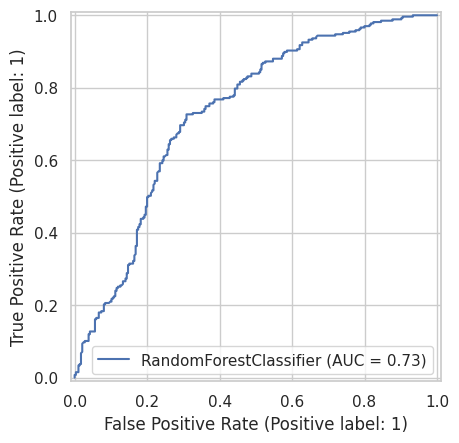

In [91]:
# ROC curve

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

# Supongamos que tienes un modelo y datos
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.show()

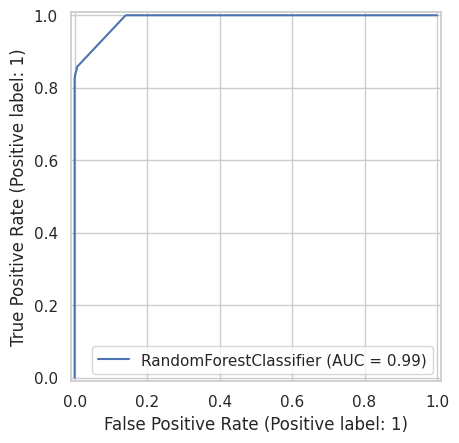

In [96]:
# Supongamos que tienes un modelo y datos
RocCurveDisplay.from_estimator(rf, X_train, y_train)
plt.show()

### **Feature importance**

In [97]:
# Display Dataframe of the dataset after feature selection (variance threshold)
X2

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,0.00,9.09,9.09,0.00,0.00,0.00,0.00,18.18,0.0,9.09
1,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.18,18.18,0.00,0.0,0.00
2,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,0.00,18.18,0.00,0.00,0.00,0.00,9.09,0.0,0.00
3,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,9.09,0.0,0.00
4,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,13.33,0.00,3.33,3.33,0.00,13.33,0.00,3.33,26.67,10.00,3.33,3.33,3.33,3.33,0.00,0.00,3.33,0.00,10.0,0.00
1418,6.67,0.00,0.00,3.33,6.67,20.00,3.33,3.33,13.33,13.33,3.33,0.00,3.33,10.00,0.00,6.67,3.33,3.33,0.0,0.00
1419,6.67,20.00,0.00,3.33,0.00,10.00,0.00,6.67,10.00,3.33,0.00,3.33,6.67,0.00,0.00,6.67,6.67,10.00,0.0,6.67
1420,6.67,0.00,3.33,3.33,6.67,0.00,3.33,3.33,3.33,6.67,3.33,16.67,3.33,6.67,10.00,6.67,0.00,13.33,0.0,3.33


In [98]:
# Retrieve feature importance from the RF model
importance = pd.Series(rf.feature_importances_, name = 'Gini')

# Retrieve feature names
feature_names = pd.Series(X2.columns, name = 'Feature')

In [99]:
# Combine feature names and Gini values into a Dataframe
df = pd.concat([feature_names, importance], axis=1, names=['Feature', 'Gini'])
df

,Feature,Gini
0,AAC_A,0.050255
1,AAC_C,0.040280
2,AAC_D,0.086965
3,AAC_E,0.081759
4,AAC_F,0.042929
5,AAC_G,0.055243
6,AAC_H,0.023733
7,AAC_I,0.055085
8,AAC_K,0.093443
9,AAC_L,0.068903


Text(0.5, 0, 'Feature Importance')

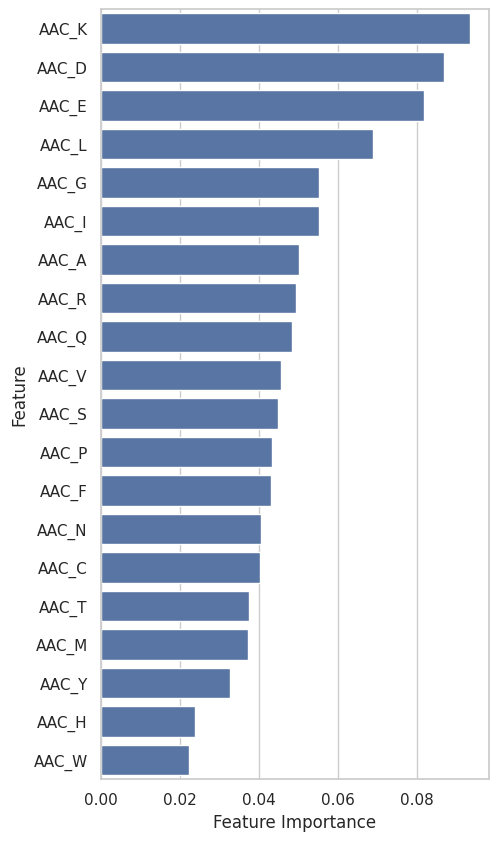

In [100]:
# Plot of feature importance
import matplotlib.pyplot as plt
import seaborn as sns

df_sorted = df.sort_values('Gini', ascending=False)[:20] # Sort by Gini in descending order; Showing only the top 20 results

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x = 'Gini', y = 'Feature', data = df_sorted)
plt.xlabel("Feature Importance")

---